# Create and train a Decision Tree model using the Mushrooms dataset

## Setup

In [1]:
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Load Dataset

In [2]:
df = pd.read_csv("mushrooms.csv", delimiter=',')
nRow, nCol = df.shape

print(f'There are {nRow} rows and {nCol} columns')

There are 8124 rows and 23 columns


## Exploratory Analysis

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
print(df.describe())

       class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top    

In [7]:
print(df.describe(include='all'))

       class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top    

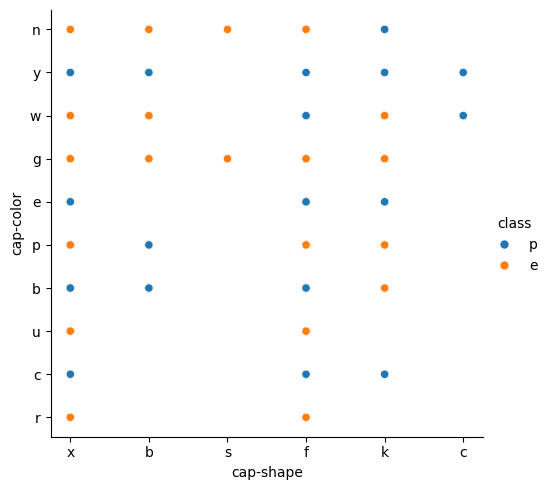

In [8]:
sns.relplot(data = df, x = 'cap-shape', y = 'cap-color', hue = 'class')

## Encode categorical variables

In [9]:
encoders = {}
for column in df.columns:
    encoder = LabelEncoder()
    encoders[column] = encoder
    df[column] = encoder.fit_transform(df[column])

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


## Split the dataset into training and testing sets.

In [10]:
X = df.iloc[:, 2:]
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training

In [11]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
y_pred = classifier.predict(X_test)

In [13]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[843   0]
 [  0 782]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Accuracy: 1.0


## Visualize the result

In [14]:
from sklearn import tree

text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_7 <= 3.50
|   |--- feature_19 <= 3.50
|   |   |--- feature_18 <= 1.50
|   |   |   |--- class: 1
|   |   |--- feature_18 >  1.50
|   |   |   |--- feature_6 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_6 >  0.50
|   |   |   |   |--- class: 1
|   |--- feature_19 >  3.50
|   |   |--- feature_9 <= 2.00
|   |   |   |--- feature_11 <= 0.50
|   |   |   |   |--- feature_20 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_20 >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_11 >  0.50
|   |   |   |   |--- class: 1
|   |   |--- feature_9 >  2.00
|   |   |   |--- class: 0
|--- feature_7 >  3.50
|   |--- feature_18 <= 1.50
|   |   |--- feature_3 <= 3.50
|   |   |   |--- class: 1
|   |   |--- feature_3 >  3.50
|   |   |   |--- class: 0
|   |--- feature_18 >  1.50
|   |   |--- feature_6 <= 0.50
|   |   |   |--- feature_12 <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_12 >  1.50
|   |   |   |   |--- feature_16 <= 1.

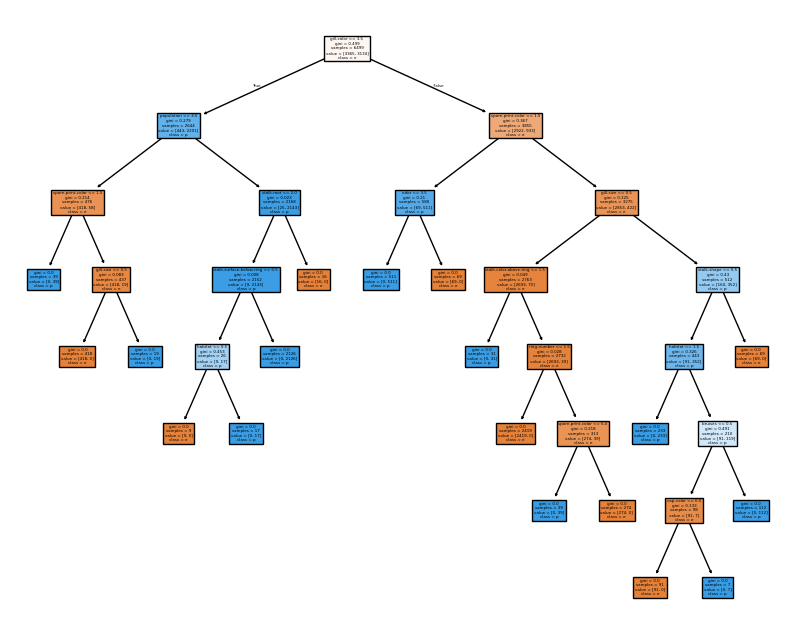

In [15]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,8))
_ = tree.plot_tree(classifier,
                   feature_names=X.columns,
                   class_names=encoders["class"].inverse_transform(sorted(y.unique())),
                   filled=True)

## Tune the model

Change hyperparameters, such as criterion, max_depth

[[843   0]
 [  0 782]]
Accuracy: 1.0
|--- feature_7 <= 0.50
|   |--- class: 1
|--- feature_7 >  0.50
|   |--- feature_18 <= 1.50
|   |   |--- feature_9 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_9 >  0.50
|   |   |   |--- class: 1
|   |--- feature_18 >  1.50
|   |   |--- feature_6 <= 0.50
|   |   |   |--- feature_18 <= 4.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_18 >  4.50
|   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_9 >  0.50
|   |   |   |   |   |--- feature_20 <= 3.50
|   |   |   |   |   |   |--- feature_10 <= 2.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_10 >  2.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_20 >  3.50
|   |   |   |   |   |   |--- class: 0
|   |   |--- feature_6 >  0.50
|   |   |   |--- feature_3 <= 5.50
|   |   |   |   |--- feature_19 <= 3.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_19 >  3.5

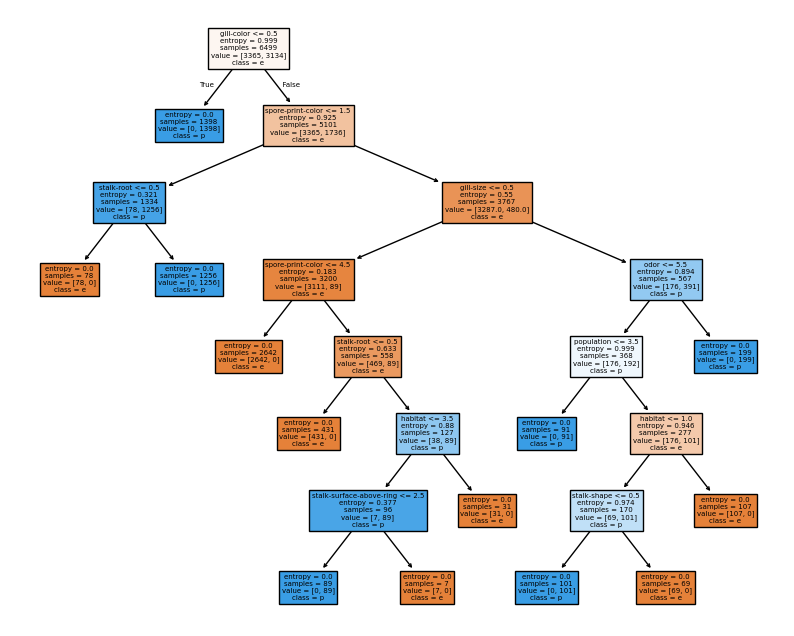

In [16]:
classifier = DecisionTreeClassifier(criterion= 'entropy')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test,y_pred))

text_representation = tree.export_text(classifier)
print(text_representation)

fig = plt.figure(figsize=(10,8))
_ = tree.plot_tree(classifier,
                   feature_names=X.columns,
                   class_names=encoders["class"].inverse_transform(sorted(y.unique())),
                   filled=True)

[[738 105]
 [223 559]]
Accuracy: 0.7981538461538461
|--- feature_7 <= 3.50
|   |--- class: 1
|--- feature_7 >  3.50
|   |--- class: 0



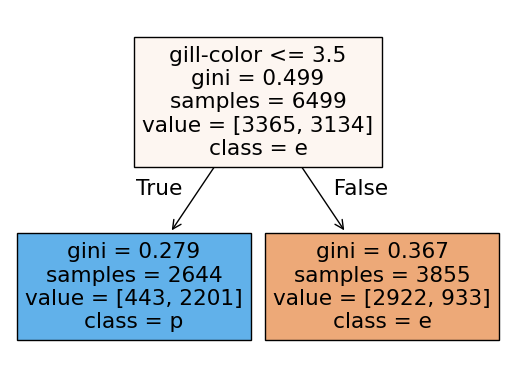

In [17]:
classifier = DecisionTreeClassifier(max_depth=1)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test,y_pred))

text_representation = tree.export_text(classifier)
print(text_representation)

fig = plt.figure()
_ = tree.plot_tree(classifier,
                   feature_names=X.columns,
                   class_names=encoders["class"].inverse_transform(sorted(y.unique())),
                   filled=True)

[[817  26]
 [124 658]]
Accuracy: 0.9076923076923077
|--- feature_7 <= 3.50
|   |--- feature_19 <= 3.50
|   |   |--- class: 0
|   |--- feature_19 >  3.50
|   |   |--- class: 1
|--- feature_7 >  3.50
|   |--- feature_18 <= 1.50
|   |   |--- class: 1
|   |--- feature_18 >  1.50
|   |   |--- class: 0



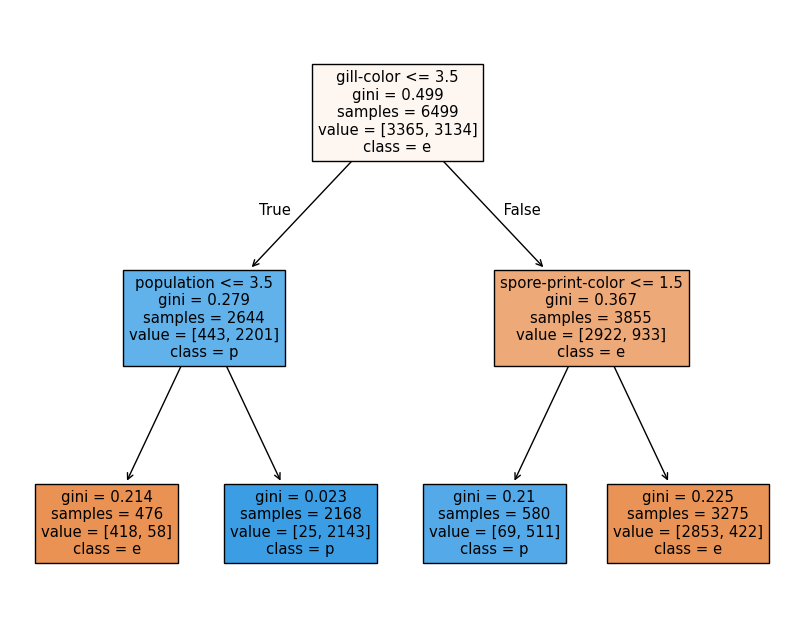

In [18]:
classifier = DecisionTreeClassifier(max_depth=2)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test,y_pred))

text_representation = tree.export_text(classifier)
print(text_representation)

fig = plt.figure(figsize=(10,8))
_ = tree.plot_tree(classifier,
                   feature_names=X.columns,
                   class_names=encoders["class"].inverse_transform(sorted(y.unique())),
                   filled=True)

In [19]:
classifier = DecisionTreeClassifier(max_depth=3)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test,y_pred))

text_representation = tree.export_text(classifier)
print(text_representation)

[[784  59]
 [ 19 763]]
Accuracy: 0.952
|--- feature_7 <= 3.50
|   |--- feature_19 <= 3.50
|   |   |--- feature_18 <= 1.50
|   |   |   |--- class: 1
|   |   |--- feature_18 >  1.50
|   |   |   |--- class: 0
|   |--- feature_19 >  3.50
|   |   |--- feature_9 <= 2.00
|   |   |   |--- class: 1
|   |   |--- feature_9 >  2.00
|   |   |   |--- class: 0
|--- feature_7 >  3.50
|   |--- feature_18 <= 1.50
|   |   |--- feature_9 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_9 >  0.50
|   |   |   |--- class: 1
|   |--- feature_18 >  1.50
|   |   |--- feature_6 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_6 >  0.50
|   |   |   |--- class: 1



In [20]:
def tree_depth_tuning(d):
  classifier = DecisionTreeClassifier(max_depth=d)
  classifier.fit(X_train, y_train)

  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  return accuracy

In [21]:
tree_results = pd.DataFrame({'D':np.arange(1, 10)})

In [22]:
tree_results['Accuracy'] = tree_results['D'].apply(tree_depth_tuning)
tree_results

,D,Accuracy
0,1,0.798154
1,2,0.907692
2,3,0.952000
3,4,0.974769
4,5,0.976615
5,6,0.999385
6,7,1.000000
7,8,1.000000
8,9,1.000000
